In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the csv file
df=pd.read_csv('Online Retail.csv')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [6]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(536641, 8)

In [8]:
#checking the null values
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [8]:
df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002709
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [10]:
#checking for count of products
df.Description.value_counts().sort_values(ascending=False)

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
RED ROSE AND LACE C/COVER                1
BLACK CHRISTMAS FLOCK DROPLET            1
FUNKY MONKEY MUG                         1
GIRLY PINK TOOL SET                      1
found some more on shelf                 1
Name: Description, Length: 4223, dtype: int64

In [11]:
#converting string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [13]:
#as description as 2709 null values we can fill it with mode
df['Description'].fillna(df.Description.mode()[0],inplace=True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [14]:
df.groupby(['Country'])['Quantity'].value_counts().sort_values(ascending=False)

Country         Quantity
United Kingdom  1           142475
                2            77900
                12           50233
                3            35135
                6            34989
                             ...  
Netherlands     7                1
                17               1
                92               1
                140              1
Unspecified     40               1
Name: Quantity, Length: 1855, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

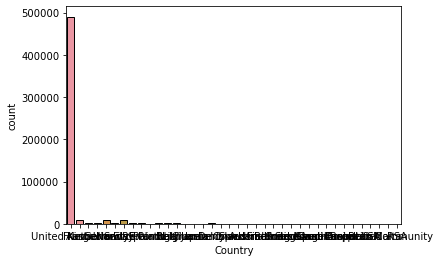

In [15]:
sns.countplot(x="Country",data= df,ec = "black")

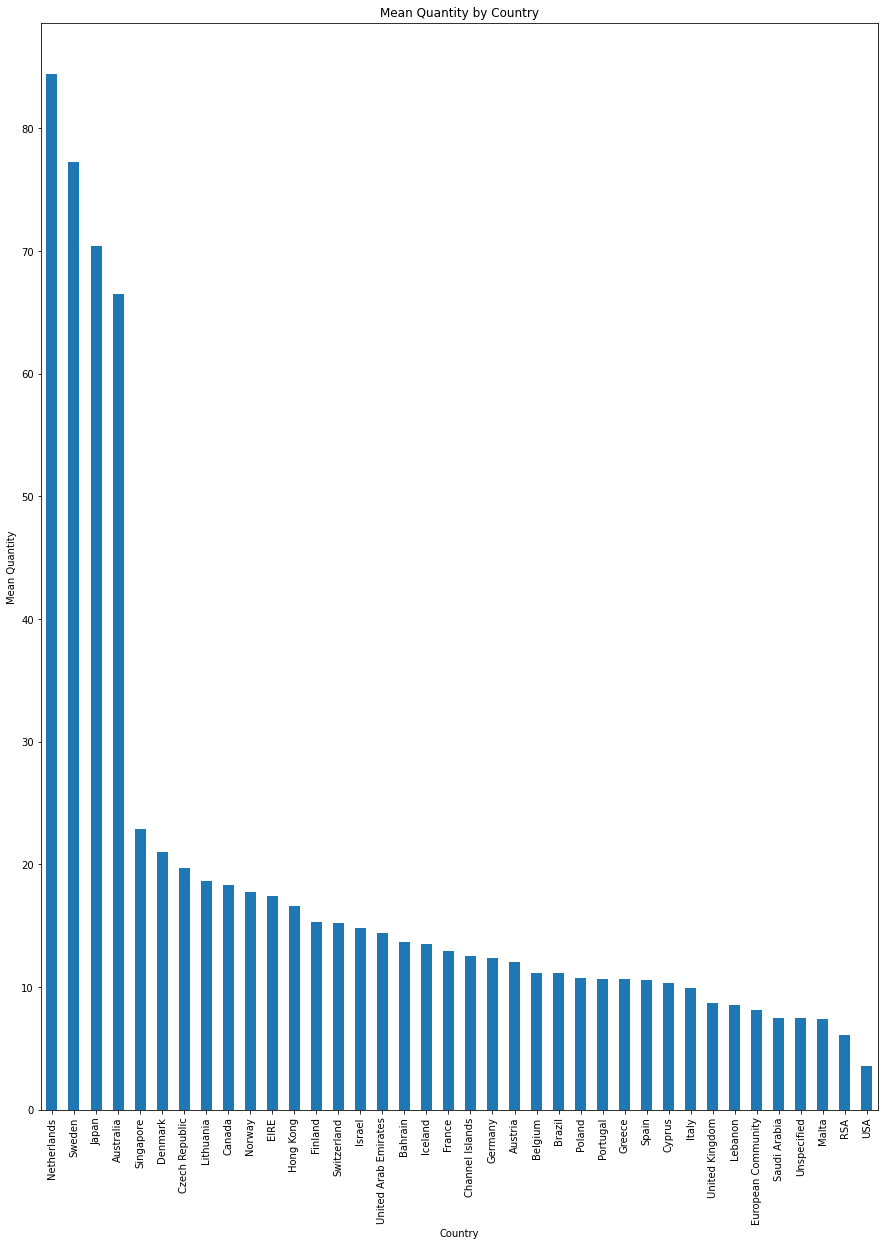

In [16]:
mean_quantity_by_country = df.groupby('Country')['Quantity'].mean().sort_values(ascending =False)
plt.figure(figsize=(15, 20))
mean_quantity_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mean Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Mean Quantity')
plt.show()

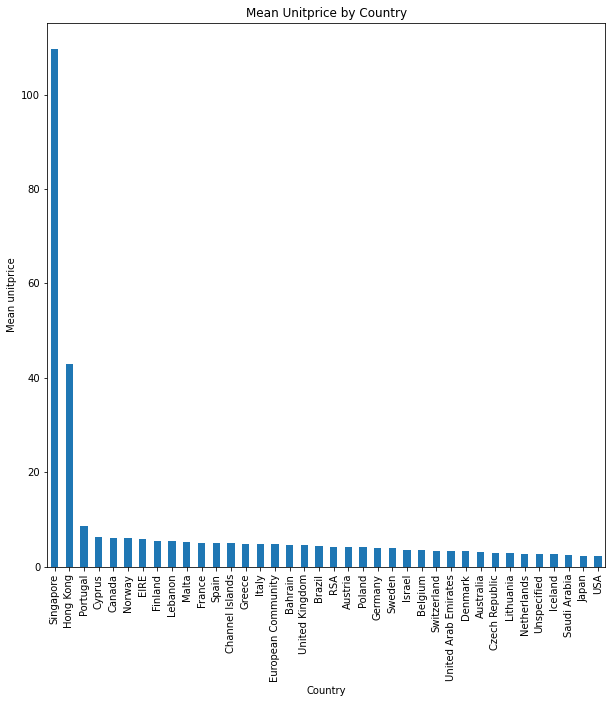

In [17]:
mean_quantity_by_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending =False)
plt.figure(figsize=(10, 10))
mean_quantity_by_country.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mean Unitprice by Country')
plt.xlabel('Country')
plt.ylabel('Mean unitprice')
plt.show()

In [22]:
year = pd.DatetimeIndex(df['InvoiceDate']).year
month = pd.DatetimeIndex(df['InvoiceDate']).month

In [23]:
year.unique()
month.unique()

Int64Index([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='InvoiceDate')

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [26]:
#calculating the total price 
df['Total_Price']=df['Quantity']*df['UnitPrice']

<AxesSubplot:xlabel='Country', ylabel='Total_Price'>

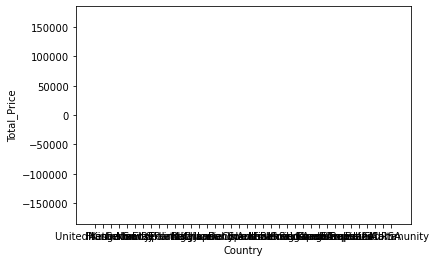

In [30]:
sns.histplot(data=df,x=df['Country'],y=df['Total_Price'])